<a href="https://colab.research.google.com/github/krithikp2100/ai-ml/blob/main/Student_Numerical_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="#6495ED"><h1><b>MAKE A COPY OF THIS NOTEBOOK SO YOUR EDITS ARE SAVED</b></h1></font>


# 👋 **Welcome to the numerical data preprocessing notebook!**
In this notebook, we'll look at a variety of data cleaning, transformation, and reduction techniques that compose the intricate process of data preprocessing. We will learn what steps we can take to get the most out of our data and generate data that will be most useful and impactful when it comes to creating machine learning models. This notebook will act as a general guide in working with numerical data.

Language and Image data require additional preprocessing to generate some form of numerical data. For this reason, we begin the journey of data preprocessing with the most fundamental numerical data and will move onto the more advanced data types in the coming weeks. The techniques and exercises in this notebook are applicable to any **numerical data**.

In this notebook, we'll be working with medical data that tries to answer the question: **Can we predict medical costs given patient information?**

In [1]:
#@title Loading in our data and importing necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Our data is stored on Google Cloud.
# We can use a command like this to upload it into Google Colab's file system
!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20%2B%20X/Independent/Main%20Curriculum/Numerical%20Data%20Preprocessing/medical_costs.csv"

medical_costs.csv   100%[===================>]  54.15K  --.-KB/s    in 0.001s  


In [2]:
# Let's load in our dataset as a pandas dataframe
medical_data = pd.read_csv("medical_costs.csv")

# 🛠️ **Standard Tools to Review**

Here are some functions that you've likely seen before that will come in handy while working on your project!

## 🔢 **Numpy functions**
### **Using `.shape`:**
We can use `.shape` to see the shape of any numpy array by doing

```python
ARRAY_NAME.shape or np.shape(ARRAY_NAME)
```
[See the documentation here](https://numpy.org/doc/stable/reference/generated/numpy.shape.html).

### **Using `np.where`**
This function can be used to find the indices of an array where the value equals what you're checking. See the general and specific example below.
```python
np.where(ARRAY == VALUE) # general
np.where(ARRAY == 15) # will return indices where the array = 15
```
[See the documentation here](https://numpy.org/doc/stable/reference/generated/numpy.where.html).

### **Using `np.min` and `np.max`**
We can use these functions to find either the minimum or maximum value in an array.
```python
np.min(ARRAY) or np.max(ARRAY)
```
See the documentation [here for min (equivalent to amin)](https://numpy.org/doc/stable/reference/generated/numpy.amin.html#numpy.amin) and [here for max (equivalent to amax)](https://numpy.org/doc/stable/reference/generated/numpy.amax.html#numpy.amax).

### **Using `np.sum` and `np.average`**
We can use these functions to find either the sum or average of an array.
```python
np.sum(ARRAY) or np.average(ARRAY)
```
See the documentation [here for sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) and [here for average](https://numpy.org/doc/stable/reference/generated/numpy.average.html).









## 📈 **Plotting**
We've seen a number of plotting functions in seaborn, but here are just a few!
* `sns.countplot(ARRAY)` to plot the number of each element in an array
* `sns.histplot(ARRAY)` to plot a histogram of the values in that array
* `sns.scatterplot(x = X_FEATURE, y = Y_FEATURE, data = DATASET)` to make a scatterplot between two features
* `sns.catplot(x = X_FEATURE, y = Y_FEATURE, data = DATASET)` to make a categorical plot between two features
* `sns.barplot(x = X_DATA, y = Y_DATA)` to make a bar plot between two features

Check out the [seaborn API reference](https://seaborn.pydata.org/api.html) for more options.



## 🐼 **Pandas**
Here's a list of some useful Pandas tools and commands. To check out more Pandas functionality, take a look at [the documentation here](https://pandas.pydata.org/docs/reference/index.html#api).

* `len(NAME_OF_DATA)` to see how many rows are in a dataframe
* `NAME_OF_DATA[COLUMN_NAME]` to index into a column in a data frame
* `NAME_OF_DATA[[COLUMN1_NAME, COLUMN2_NAME...]]` to index into multiple columns
* `NAME_OF_DATA[COLUMN_NAME].value_counts()` to count the number of values in each category in a particular column  
* `NAME_OF_DATA[COLUMN_NAME].unique()` to see all unique values in a column
* `NAME_OF_DATA.head()` to get the first 5 rows in a dataframe
* `NAME_OF_DATA.tail()` to get the last 5 rows in a dataframe
* `NAME_OF_DATA.sort_values(by=COLUMN_NAME)` to sort the dataframe from least to greatest value according to the column chosen
* `NAME_OF_DATA.iloc[ROW_NUMBER]` to get a specific row in a dataframe
* `NAME_OF_DATA.isna()` to count the number of null values by column
* `NAME_OF_DATA.fillna()` to fill the null values in your dataframe

You can grab values in a column based on a specific condition as well! Let's say you wanted to look at all of the patients that have more than 2 children in their household. You could do this by writing:

```python
medical_data[medical_data['children']>2]
```
Or, let's say you wanted to all the patients with exactly 5 children. You could do this like:
```python
medical_data[medical_data['children']==5]
```

You can combine this idea with the operations above to do some pretty cool stuff!


# 🏫 **Let's learn more about the data!**

We're going to use the functions above to answer some questions about the data set. Work together with your coding group to come up with the solutions!

Every time when you're starting out with a new data set, there's one question you need to ask yourself first: is the fundamental question this data can answer a **regression** problem or a **classification** problem?

In [ ]:
#@title Regression or Classification?
r_or_c = "Regression" #@param ["", "Regression", "Classification"]

if r_or_c == "Regression":
  print("Correct! Regression problems deal with numerical predictions.")
else:
  print("Incorrect. Try again!")

## **To start out, let's look at some of the data set so we can see what some data points look like!**

In [3]:
# YOUR CODE HERE
medical_data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0.0,yes,southwest,16884.92400
1,18,male,33.77,1.0,no,southeast,1725.55230
2,28,male,33.00,3.0,no,southeast,4449.46200
3,33,male,NaN,0.0,no,northwest,21984.47061
4,32,male,28.88,0.0,no,northwest,3866.85520


## **What are the dimensions of the data set?**

In [4]:
# YOUR CODE HERE
medical_data.shape


(1338, 7)

## **What are the relevant columns in this data set?**
In this data set, we have a number of different columns - some of which may be more useful than others. One column will serve as the output, and the rest will serve as the input. Which of the data columns can serve as the output (`y`) to our model?


In [5]:
# YOUR CODE HERE
#@markdown Our output should be:
data_output = "charges" #@param ["", "age", "sex", "bmi", "children", "smoker", "region", "charges"]

if data_output == 'charges':
  print("That's the correct output!")
else:
  print("That's not the correct output, try again!")



That's the correct output!


## **What does the distribution of our data set look like based on medical charges?**
To answer this question, you want to plot the distribution of views in the data set!



<Axes: xlabel='charges', ylabel='Count'>

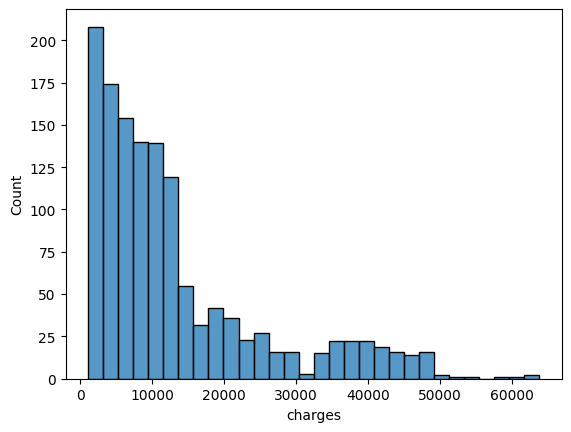

In [8]:
# YOUR CODE HERE
sns.histplot(medical_data['charges'])
# sns.boxplot(medical_data['charges'])

Some follow up questions to consider:
* Are there any outliers in the data set?
* If there are outliers, is it more useful to keep them in or get rid of them?

## **What is the range of the output in our data set (i.e. the minimum and maximum)?**

This information will be useful to know for a regression problem!



In [11]:
# YOUR CODE HERE
print(np.min(medical_data['charges']))
print(np.max(medical_data['charges']))

1121.8739
63770.42801


## **What is the sum and average cost of medical expenses for all the patients?**




In [13]:
# YOUR CODE HERE
print(np.sum(medical_data['charges']))
print(np.average(medical_data['charges']))

17755824.990759
13270.422265141257


## **Check out the smoking status of the 5 patients with the highest medical expenses and the 5 patients with the lowest medical expenses. Do you notice any relation between smoking status and the cost of medical expenses?**




In [17]:
# YOUR CODE HERE
medical_data.sort_values('charges').head()
# medical_data.sort_values('charges').tail()

,age,sex,bmi,children,smoker,region,charges
940,18,male,23.21,0.0,no,southeast,1121.8739
808,18,male,30.14,0.0,no,southeast,1131.5066
1244,18,male,33.33,0.0,no,southeast,1135.9407
663,18,male,33.66,0.0,no,southeast,1136.3994
22,18,male,NaN,0.0,no,southeast,1137.0110


# ⚙️ **Pre-Processing Steps**
Now that we've done a preliminary exploration of our dataset, it is time to delve deep and process the data to get it ready for model development. There are three overarching steps in pre-processing data that all consist of a variety of distinct techniques. These three steps are often referred to as:
1. Cleaning
2. Transformation
3. Reduction




## 🧹 **Cleaning your dataset**

Often times, your data will not be perfect. You may be missing some values for specific features, there may be strange outliers that wildly skew the data, or there may be other sources of noise that have perturbed the existing values that you need to account for. While you could just throw out the data samples that don't beneficially contribute to your machine learning model, you may miss out on a lot of valuable information. So, there are many techniques to clean your data to minimize some of these errors.

Let's take a look at **Data Imputation**, or the process of dealing with missing values in your dataset. Specifically, this process consists of filling in the missing values with estimates of the actual values.

First, let's try to observe the problem at hand by solving the question below.

### **How many values in your dataset are missing (are equal to null)?**

*Hint: Check out the pandas function [isnull()](https://pandas.pydata.org/docs/reference/api/pandas.isnull.html) in combination with a sum over the columns of the resulting dataframe.*

In [22]:
# YOUR CODE HERE
medical_data.isnull().sum().sum()

np.int64(53)

### **Mean imputation of the missing values**

As you have shown, there are many values in the **bmi** and **children** feature columns that are missing. Instead of getting rid of these data samples entirely, we will impute the data in these columns. A common way to perform this imputation is to fill in the missing values with the average value of the respective column. This way, these samples won't impact the machine learning model significantly one way or another and we can still benefit from the data.

For this problem, replace the null values in your original dataframe with the average of the respective column. That is, replace the null values in the **bmi** column with the average of the **bmi** column and replace the null values in the **children** column with the average of the **children** column. Make sure to modify the original dataframe and not to create a new one.

*Hint: Check out the pandas function [fillna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html) to simplify this process for each column.*

In [38]:
medical_data['bmi'].dropna()

,bmi
0,27.90
1,33.77
2,33.00
4,28.88
5,25.74
...,...
1332,44.70
1333,30.97
1335,36.85
1336,25.80


In [41]:
# YOUR CODE HERE
medical_data['bmi'] = medical_data['bmi'].fillna(np.average(medical_data['bmi'].dropna()))
medical_data['children'] = medical_data['children'].fillna(np.average(medical_data['children'].dropna()))
medical_data.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


## 🦋 **Transforming your dataset**

### **Discretization**

Machine learning models are stronger and more powerful with clean and meaningful data. You will transform the features in your dataset to be more meaningful and beneficial in a number of ways. Namely, you will convert the **age** feature to be one that is more categorical in nature - separating age into three separate bins:
- young: 18-33 years old
- middle: 34-49 years old
- elder: 50+ years old

Knowing the exact age of a patient is not the most interesting piece of information for our purposes. Instead, if we have general bins like the ones above, we can derive a relationship between the age range and the medical costs. In the function below, you will loop through all the rows of your dataframe and access the age field. For each age, append the string `'young'`, `'middle'`, or `'elder'` to the `age_category_features` list.

In [42]:
def get_categorical_age():
  age_categorical_features = []
  for i, row in medical_data.iterrows():
    age = row['age']
    ### BEGIN YOUR CODE HERE ###
    if age >= 18 and age <= 33:
      age_categorical_features.append('young')
    if age >= 34 and age <= 49:
      age_categorical_features.append('middle')
    if age >= 50:
      age_categorical_features.append('elder')
    ### END YOUR CODE HERE ###
  return age_categorical_features

age_categorical_features = get_categorical_age()

### **Numerical Transformation**

Additionally, you will convert categorical variables like **sex**, **region**, **smoker**, and now **age** into their quantitative counterparts. ML models are very capable of dealing with quantities instead of strings with categorical features. For example, instead of working with the strings `'male'` and `'female'`, we will convert them into the value `0` and `1` respectively, where `0` represents `'male'` and `1` represents '`female'`.

The transformations that we would like to make for each of the categorical features are defined below.

**Sex**
*   `'female'` ➜ `0`
*   `'male'` ➜ `1`

**Smoker**
*   `'no'` ➜ `0`
*   `'yes'` ➜ `1`

**Region**
*   `'northeast'` ➜ `0`
*   `'northwest'` ➜ `1`
*   `'southeast'` ➜ `2`
*   `'southwest'` ➜ `3`

**Age**
*   `'elder'` ➜ `0`
*   `'middle'` ➜ `1`
*   `'young'` ➜ `2`


In this problem, we will be converting all the categorical features to their respective quantities as defined above. We will be using a useful object known as a `LabelEncoder`. To use the `LabelEncoder`, we first import it from the `sklearn.preprocessing` package. Next, you initialize the `LabelEncoder` object as follows:

```python
le = LabelEncoder()
```

The process of converting your features requires two steps: *fitting* the LabelEncoder on the categorical features and then *transforming* your features from categorical to numerical. These two steps can be done as follows:

```python
le.fit(categorical_features)
numerical_features = le.transform(categorical_features)
```

Consider this simple example below for age:

In [43]:
from sklearn.preprocessing import LabelEncoder

example_categorical_features = ['young', 'young', 'middle', 'young', 'elder', 'middle']

le = LabelEncoder()
le.fit(example_categorical_features)
example_numerical_features = le.transform(example_categorical_features)
print(example_numerical_features)

[2 2 1 2 0 1]


**Now it's your turn!** Write code below to encode the categorical features for **age**, **sex**, and **region**. Use the `age_category_features` list that you previously created as the input to the LabelEncoder for **age**. As for **sex**, **smoker**, and **region**, access the relevant columns from your `medical_data` pandas dataframe and use those as input.

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

### BEGIN YOUR CODE HERE

############### Age ###############
# STEP 1: Fit LabelEncoder on age_categorical_features
le.fit(age_categorical_features)
# STEP 2: Transform age_categorical_features and save in variable named age_numerical_features
age_numerical_features = le.transform(age_categorical_features)

############### Sex ###############
# STEP 1: Fit LabelEncoder on sex_categorical_features
le.fit(medical_data['sex'])
# STEP 2: Transform sex_categorical_features and save in variable named sex_numerical_features
sex_numerical_features = le.transform(medical_data['sex'])

############## Smoker #############
# STEP 1: Fit LabelEncoder on smoker_categorical_features
le.fit(medical_data['smoker'])
# STEP 2: Transform smoker_categorical_features and save in variable named smoker_numerical_features
smoker_numerical_features = le.transform(medical_data['smoker'])

############## Region #############
# STEP 1: Fit LabelEncoder on region_categorical_features
le.fit(medical_data['region'])
# STEP 2: Transform region_categorical_features and save in variable named region_numerical_features
region_numerical_features = le.transform(medical_data['region'])

### END YOUR CODE HERE

print()
print(age_numerical_features)
print(medical_data['sex'])
print(sex_numerical_features)
print(medical_data['smoker'])
print(smoker_numerical_features)
print(medical_data['region'])
print(region_numerical_features)

['young', 'young', 'young', 'young', 'young', 'young', 'middle', 'middle', 'middle', 'elder', 'young', 'elder', 'young', 'elder', 'young', 'young', 'elder', 'young', 'elder', 'young', 'elder', 'young', 'young', 'middle', 'middle', 'elder', 'elder', 'elder', 'young', 'young', 'young', 'young', 'young', 'elder', 'young', 'young', 'elder', 'young', 'middle', 'elder', 'young', 'young', 'middle', 'middle', 'middle', 'elder', 'young', 'young', 'elder', 'middle', 'young', 'young', 'middle', 'middle', 'middle', 'elder', 'elder', 'young', 'elder', 'middle', 'middle', 'young', 'elder', 'young', 'young', 'young', 'elder', 'middle', 'middle', 'young', 'young', 'young', 'elder', 'elder', 'middle', 'elder', 'young', 'young', 'young', 'middle', 'young', 'middle', 'young', 'middle', 'middle', 'middle', 'elder', 'elder', 'middle', 'elder', 'young', 'elder', 'elder', 'middle', 'elder', 'young', 'elder', 'elder', 'elder', 'middle', 'middle', 'young', 'young', 'elder', 'middle', 'young', 'young', 'young',

In [53]:
medical_data['age'] = age_numerical_features
medical_data['sex'] = sex_numerical_features
medical_data['smoker'] = smoker_numerical_features
medical_data['region'] = region_numerical_features

medical_data.head()

,age,sex,bmi,children,smoker,region,charges
0,2,0,27.900000,0.0,1,3,16884.92400
1,2,1,33.770000,1.0,0,2,1725.55230
2,2,1,33.000000,3.0,0,2,4449.46200
3,2,1,30.675974,0.0,0,1,21984.47061
4,2,1,28.880000,0.0,0,1,3866.85520


## ♟️ **Reducing your datset**

Not all features are equally important. In this data for example, the **smoker** status of a patient may be a far more impactful feature in determining medical costs than a patient's **region**. Likewise, some combination of the input features may be most impactful in distinguishing the patients.

Many techniques have been created to *select* features or *reduce* features. We will be taking a look at a very common approach used to *reduce* the number of features from our input dataset. This technique is most useful when dealing with datasets with a large number of features (>1000 features) per sample.

Before we attempt this approach, let us first download and read in the fully preprocessed dataset.

In [50]:
#@title Load Preprocessed Dataset

!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20%2B%20X/Independent/Main%20Curriculum/Numerical%20Data%20Preprocessing/medical_costs_preprocessed.csv"

medical_costs_prepr 100%[===================>]  37.83K  --.-KB/s    in 0s      


In [51]:
# Let's load in our preprocessed dataset as a pandas dataframe
medical_data_preprocessed = pd.read_csv('medical_costs_preprocessed.csv')

In [52]:
# Print the first 5 samples to observe the preprocessed and numerically transformed features
medical_data_preprocessed.head()

,age,sex,bmi,children,smoker,region,charges
0,2,0,27.900000,0.0,1,3,16884.92400
1,2,1,33.770000,1.0,0,2,1725.55230
2,2,1,33.000000,3.0,0,2,4449.46200
3,2,1,30.675974,0.0,0,1,21984.47061
4,2,1,28.880000,0.0,0,1,3866.85520


We will be using a technique known as **Principal Component Analysis (PCA)** to create *2* new features that explain our dataset best.

In [54]:
from sklearn.decomposition import PCA

# (1) Initialize PCA object with 2 components
pca = PCA(n_components=2)

# (2) Learn Principal Components
principal_components = pca.fit_transform(medical_data_preprocessed)

# (3) Create Dataframe to hold spectograms and respective resistant antibiotics
principal_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])

In [55]:
principal_df

,PC1,PC2
0,3614.501437,-3.099634
1,-11544.869621,4.238168
2,-8820.959998,3.200340
3,8714.048270,-0.873217
4,-9403.567219,-0.889529
...,...,...
1333,-2669.873892,0.550662
1334,-11064.441435,1.034811
1335,-11640.588126,7.323196
1336,-11262.477716,-3.727182


In [79]:
#@title Run to Intitialize Plot Function

def create_pca_plot(category):
  principal_df[category] = medical_data_preprocessed[category] # Categories to visualize

  fig = plt.figure(figsize = (12, 8))
  ax = fig.add_subplot(1,1,1)
  ax.set_xlabel('First Principal Component', fontsize = 15)
  ax.set_ylabel('Second Principal Component', fontsize = 15)
  targets = pd.unique(medical_data_preprocessed[category]).tolist() # All possible y values
  colors = ['red', 'blue', 'orange', 'purple'] # different colors for different targets
  colors = colors[:len(targets)]
  for target, color in zip(targets, colors): # label points by antibiotic resistant target
      indicesToKeep = principal_df[category] == target
      ax.scatter(principal_df.loc[indicesToKeep, 'PC1'],
                principal_df.loc[indicesToKeep, 'PC2'],
                c = color, s = 40, alpha=0.75)
  if category == 'smoker':
    names = ['Non-Smoker', 'Smoker']
  elif category == 'sex':
    names = ['Female', 'Male']
  elif category == 'region':
    names = ['Northeast', 'Northwest', 'Southeast', 'Southwest']
  ax.legend(targets, loc='lower right')
  ax.get_xaxis().set_ticks([]);
  ax.get_yaxis().set_ticks([]);

Running the cell above defines the plot function `create_pca_plot(category)` in which you can pass in the column category from the dataset and observe your results. Run the cell below to `create_pca_plot('smoker')` to observe a visualization of the PCA features when grouped by smoker status.

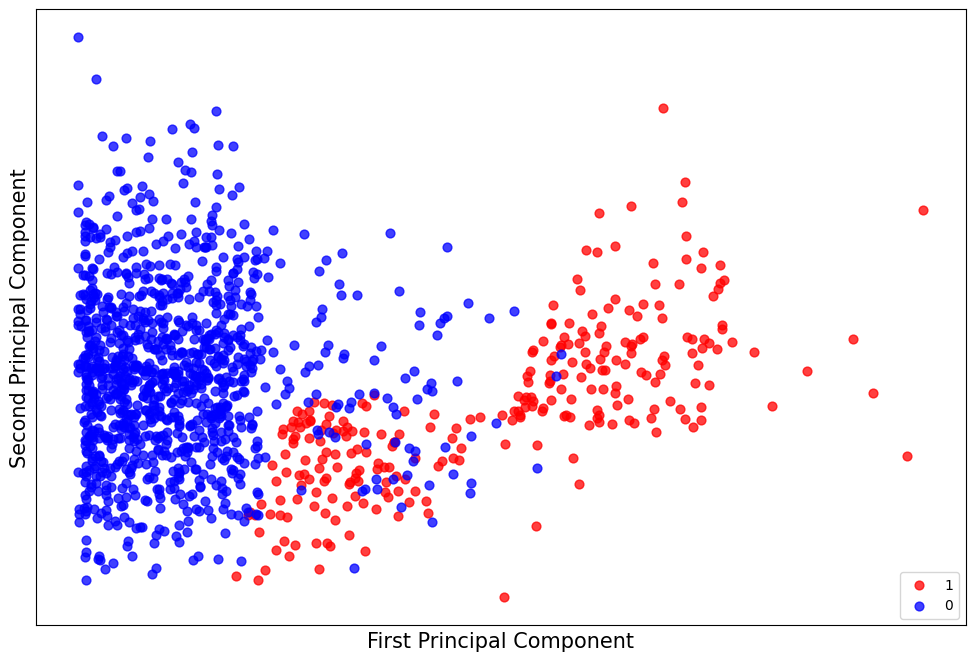

In [69]:
create_pca_plot('smoker')

The plot above is a visualization of the two new features, or components, you created with PCA when categorized by smoker status. As you can see, the samples are quite grouped together with other samples of similar smoker status. When you see clearly defined groups in your PCA plot, it signifies the value of the decomposition for the task at hand.

**Now it's your turn!** Use the predefined `create_pca_plot(category)` function and pass in `'sex'`, `'region'`, or `'age'` for `category` and observe your results!

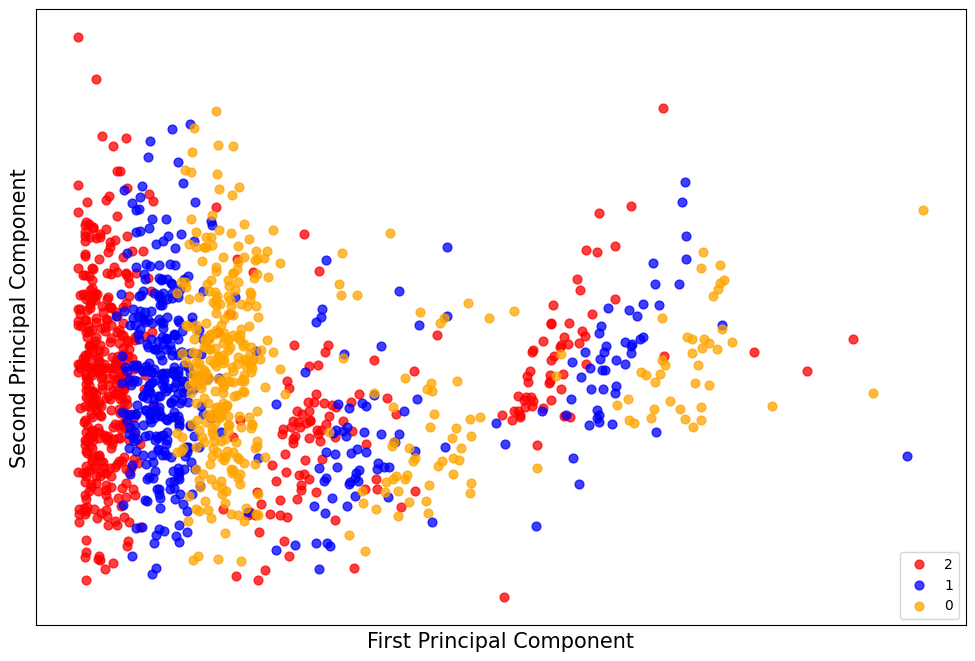

In [80]:
### YOUR CODE HERE
create_pca_plot('age')

<font color="#6495ED"><h1><b>That's it for numerical data pre-processing!</b></h1></font>
<h4>Like we said earlier, there are a number of ways to process data before sending it to your model, and here we've just covered some. Hopefully this will help you know how to begin your project code! </h4>